# Singular Value Decomposition

SVD is the crux of LinAl as it combines several of LinAl topics in one single concept. The most famous LinAl teacher Gilbert Strang calls the SVD the climax of his course.<br>

SVD is known under many different names: <br>
Factor analysis, principal component (PC) decomposition and empirical orthogonal function (EOF) analysis. All these are mathematically equivalent, although the way they are treated in the literature is often quite different.
<br><br>
A = US(V.T)
<br><br>
A : n×m : number of records as rows and number of dimensions/features as columns.<br>
U : n×n : orthogonal matrix containing eigenvectors of A(A.T)<br>
S : n×m : ordered singular values in the diagonal. Square root of eigenvalues associated with A(A.T) or (A.T)A<br>
V : m×m : orthogonal matrix containing eigenvectors of (A.T)A<br>
<br>
V must diagonalize (A.T)A <br>
v(i) are eigenvectors of (A.T)A
<br> <br>
U must diagonalize A(A.T) <br>
u(i) are eigenvectors of A(A.T)
<br> <br>
v(i)...v(r) forms an orthonormal basis for the range of A.T  <br>
u(i)...u(r) form an orthonormal basis for the range of A <br>
Rank of A is equal to the number of nonzero entries of S.

**Intuition:** We can construct an ellipse of any size and orientation by stretching and rotating a unit circle. S will be a diagonal matrix containing the major and minor axes.

In [1]:
import numpy as np
from numpy import array, diag
from math import cos, sin
from numpy.linalg import eig
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Generate a martix from its SVD

https://www.mathworks.com/company/newsletters/articles/professor-svd.html

Given: <br>
σ1=2,  σ2=1/2, <br> θ=π/6,  ϕ=π/4

Let <br>
U=[−cosθ sinθ; sinθ cosθ]<br>
Σ=[σ1 0; 0 σ2]<br>
V=[−cosϕ sinϕ; sinϕ cosϕ]<br>

In [2]:
theta = (np.pi)/6 
phi   = (np.pi)/4

s1    = 2.0
s2    = 0.5

U = array([[-cos(theta), sin(theta)], [sin(theta), cos(theta)]])
S = array([[    s1     ,      0    ], [     0    ,    s2     ]])
V = array([[-cos( phi ), sin( phi )], [sin( phi ), cos( phi )]])

print 'U:' , '\n' , np.around(U , decimals = 4) , '\n'
print 'S:' , '\n' , np.around(S , decimals = 4) , '\n'
print 'V:' , '\n' , np.around(V , decimals = 4) , '\n'

U: 
[[-0.866  0.5  ]
 [ 0.5    0.866]] 

S: 
[[ 2.   0. ]
 [ 0.   0.5]] 

V: 
[[-0.7071  0.7071]
 [ 0.7071  0.7071]] 



The matrices U and V are rotations through angles θ and ϕ, followed by reflections in the first dimension. The matrix Σ is a diagonal scaling transformation. <br><br>
Generate A by computing <br>
A=UΣ(V.T)

In [3]:
A = U.dot(S.dot(V))
print 'A:' , '\n' , np.around(A , decimals = 4) 

A: 
[[ 1.4015 -1.048 ]
 [-0.4009  1.0133]]


This says that the matrix A can be generated by a rotation through 45° (ϕ=π/4) and a reflection, followed by independent scalings in each of the two coordinate directions by factors of 2 and 1/2, respectively, followed by a rotation through 30° (θ=π/6) and another reflection.

In [4]:
values, vectors = eig(A)

print 'Eigen-vectors:' , '\n' , np.around(vectors , decimals = 4) , '\n'
print 'Eigen-values: ' , '\n' , np.around(values , decimals = 4) , '\n'

Eigen-vectors: 
[[ 0.9083  0.7691]
 [-0.4182  0.6391]] 

Eigen-values:  
[ 1.884   0.5308] 



Defining some functions for plotting

In [5]:
def plot_points(matrix, ls='--', lw=1.2, colors=None, circle=False):
    """
    Plots a 2xn matrix where 1st row are the x-coordinates 
    and 2nd row are the y-coordinates.
    
    Parameters:
    matrix - 2xn matrix
    ls - matplotlib linestyle
    lw - matplotlib linewidth
    colors - 1D array of colours (http://matplotlib.org/examples/color/named_colors.html)
    """
    x_points, y_points = matrix
    size = len(x_points)
    for i in range(size):
        if circle==True:
            plt.plot(x_points[i], y_points[i], color=colors[i])
        else:
            plt.plot(x_points[i], y_points[i], color=colors[i], marker='o')
        plt.plot([x_points[i], x_points[(i+1) % size]], [y_points[i], y_points[(i+1) % size]], color=colors[i], linestyle=ls, linewidth=lw)
        
def plot_point_label(prefix, point, location):
    """
    Plots a (x, y) point as a label
    
    Parameters:
    prefix - The name given to the point. E.g. 'p1'
    point - 1D array of [x, y]
    location - tuple coordinates of the label
    """
  
    plt.annotate('{0}={1}'.format(prefix, tuple(map(lambda x: round(x, 2), point))), 
    xy=point, xytext=location, textcoords='data', color='white', weight='semibold',
    bbox=dict(fc='navy', alpha=0.6, ec='none'), arrowprops=dict(arrowstyle='->'))
    
def set_axis(circle=False):
    # Set the axes
    ax = plt.axes() 
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_aspect('equal')

    # Limit the plot
    if circle==True:
        ax.set_xlim((-2, 2))
        ax.set_ylim((-2, 2))        
    else:    
        plt.xlim([-50, 30])
        plt.ylim([-35, 35])

    plt.show()

Let's see the effect of operator A on unit circle
<br> <br>
--The green circle is the unit circle in the plane. <br>
--The blue ellipse is the image of this circle under transformation by the matrix A.

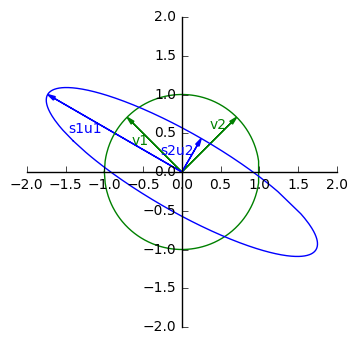

In [6]:
x_circle = np.arange(-1, 1, 0.01)
y_circle = np.sqrt(1-x_circle**2)

x = np.concatenate((x_circle, np.flip(x_circle, axis=0)))
y = np.concatenate((y_circle, np.flip(-y_circle, axis=0)))

circle_matrix   = np.array([x, y])
plt.plot(x, y, 'g-')

ax = plt.axes()
ax.arrow(0, 0, V[0][0], V[0][1], head_width=0.05, head_length=0.1, fc='g', ec='g', length_includes_head=True)
ax.annotate("v1", xy=V[0],  xytext=(V[0][0]/2-0.3, V[0][1]/2), color = 'g')
ax.arrow(0, 0, V[1][0], V[1][1], head_width=0.05, head_length=0.1, fc='g', ec='g', length_includes_head=True)
ax.annotate("v2", xy=V[1],  xytext=(V[1][0]/2, V[1][1]/2+0.2), color = 'g')

ellipse_matrix = A.dot(circle_matrix)
x_ellipse, y_ellipse = ellipse_matrix
plt.plot(x_ellipse, y_ellipse, 'b-')

ax.arrow(0, 0, S[0][0]*U[0][0], S[0][0]*U[0][1], head_width=0.05, head_length=0.1, fc='b', ec='b', length_includes_head=True)
ax.annotate("s1u1", xy=(S[0][0]*U[0][0], S[0][0]*U[0][1]),  xytext=(S[0][0]*U[0][0]/2-0.6, S[0][0]*U[0][1]/2), color = 'b')
ax.arrow(0, 0, S[1][1]*U[1][0], S[1][1]*U[1][1], head_width=0.05, head_length=0.1, fc='b', ec='b', length_includes_head=True)
ax.annotate("s2u2", xy=(S[1][1]*U[1][0], S[1][1]*U[1][1]),  xytext=(S[1][1]*U[1][0]/2-0.4, S[1][1]*U[1][1]/2), color = 'b')

set_axis(circle=True)

--The green vectors, v1 and v2, which are the columns of V, and the blue vectors, u1 and u2, which are the columns of U, are two different orthogonal bases for 2-D space. <br>
--The columns of V are rotated 45° from the axes of the figure, while the columns of U, which are the major and minor axes of the ellipse, are rotated 30°. <br>
--The matrix A transforms v1 into σ1u1 and v2 into σ2u2.

Let's see this again step by step. First divide the circle into 4 arcs. <br>
Notice that red is followed by blue in clockwise direction

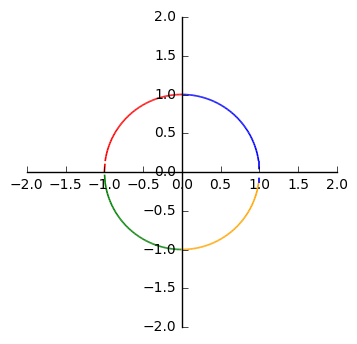

In [7]:
color_repititions = len(x_circle)/2
colors = ['red', 'blue', 'orange', 'green']
colors = np.repeat(colors, color_repititions)

plt.gcf().clear()

plot_points(circle_matrix, colors=colors, circle=True)
set_axis(circle=True)

#### Step 1:
Effect of V: <br>
Rotation by 45° AND flip (Notice that blue is now followed by red in clockwise direction)

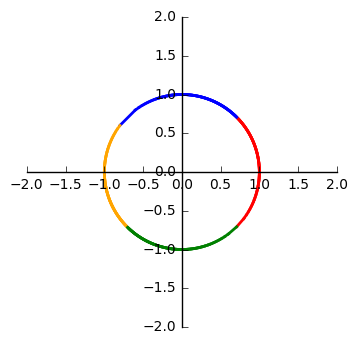

In [8]:
plt.gcf().clear()

step_1 = V.dot(circle_matrix)
#step_1 = (V.T)*circle_matrix

plot_points(step_1, '-', lw=2.0, colors=colors, circle=True) 
set_axis(circle=True)

#### Step 2:
Stretching and shrinking

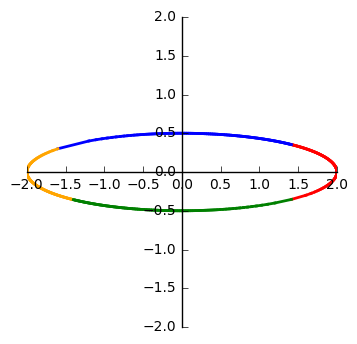

In [9]:
plt.gcf().clear()

step_2 = S.dot(step_1)
#step_2 = S*step_1

plot_points(step_2, '-', lw=2.0, colors=colors, circle=True) 
set_axis(circle=True)

#### Step 3:
Effect of U: <br>
Rotation by 30° AND flip (Notice that red is now again followed by blue in clockwise direction)

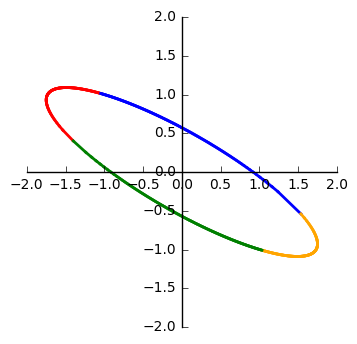

In [10]:
plt.gcf().clear()

step_3 = U.dot(step_2)
#step_3 = S*step_2

plot_points(step_3, '-', lw=2.0, colors=colors, circle=True) 
set_axis(circle=True)

### SVD of a 2-D matrix

https://alyssaq.github.io/2015/singular-value-decomposition-visualisation/

Let's see another example with a different operator A and different data. <br>

Transformation of a matrix by US(V.T) can be visualised as a rotation and reflection, scaling, rotation and reflection. We’ll see this as a step-by-step visualisation.

In [11]:
# Transformation matrix A
A = np.matrix([[1, 0.3], [0.45, 1.2]])

U, s, V = np.linalg.svd(A)

S = diag(s)

print 'U:' , '\n' , np.around(U , decimals = 4) , '\n'
print 'S:' , '\n' , np.around(S , decimals = 4) , '\n'
print 'V:' , '\n' , np.around(V , decimals = 4) , '\n'

U: 
[[-0.5819 -0.8133]
 [-0.8133  0.5819]] 

S: 
[[ 1.4907  0.    ]
 [ 0.      0.7144]] 

V: 
[[-0.6359 -0.7718]
 [-0.7718  0.6359]] 



#### Geometric interpretation of SVD

Let's create matrix x

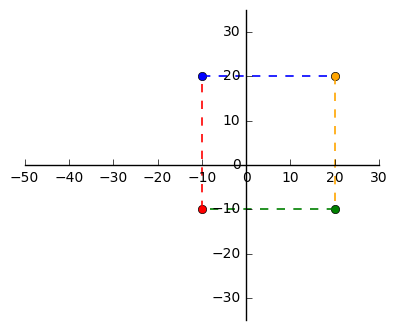

In [12]:
x_points = np.array([-10, -10, 20, 20 ])
y_points = np.array([-10,  20, 20, -10])
matrix   = np.array([x_points, y_points])

colors = ['red', 'blue', 'orange', 'green']

plt.gcf().clear()
plot_points(matrix, colors=colors)
set_axis()

#### Step#1 (V.T)x
We can see that multiplying by (V.T) rotates and reflects the input matrix x. Notice the swap of colours red-blue and green-yellow indicating a reflection along the x-axis.

[[-10 -10  20  20]
 [-10  20  20 -10]]

transformed to:

[[ 14.0767  -9.0772 -28.1533  -4.9994]
 [  1.3593  20.4354  -2.7185 -21.7946]]


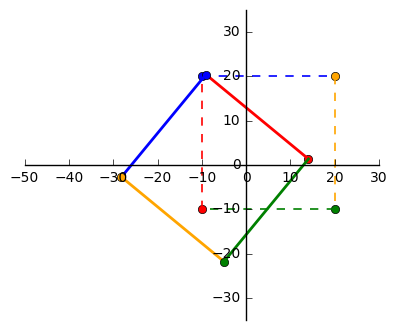

In [13]:
step_1 = (V.T)*matrix
print matrix
print '\ntransformed to:\n'
print np.around(step_1 , decimals = 4)

plt.gcf().clear()
plot_points(matrix, colors=colors)
plot_points(step_1.A, '-', lw=2.0, colors=colors)  # numpy.matrix.A  returns self as an ndarray object.
set_axis()

#### Step#2 S(V.T)x

Since S only contains values on the diagonal, it simply scales the matrix. The singular values S are ordered in descending order so s1>s2>…>sn. V rotates the matrix to a position where the singular values now represent the scaling factor along the x and y-axis. This is now the V-basis.

(V.T)x  is dashed and S(V.T)x is solid

[[ 14.0767  -9.0772 -28.1533  -4.9994]
 [  1.3593  20.4354  -2.7185 -21.7946]]

transformed to:

[[ 20.9835 -13.531  -41.967   -7.4525]
 [  0.9711  14.6     -1.9422 -15.5712]]


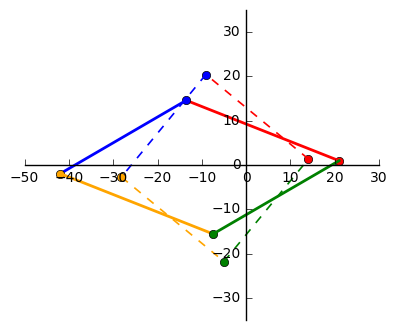

In [14]:
step_2 = S*step_1

print np.around(step_1 , decimals = 4)
print '\ntransformed to:\n'
print np.around(step_2 , decimals = 4)

plt.gcf().clear()
plot_points(step_1.A, colors=colors)
plot_points(step_2.A, '-', lw=2.0, colors=colors)
set_axis()

#### Step#3 US(V.T)x

Finally, U rotates and reflects the matrix back to the standard basis. As expected, this is exactly the same as Ax.

S(V.T)x  is dashed and US(V.T)x is solid

[[ 20.9835 -13.531  -41.967   -7.4525]
 [  0.9711  14.6     -1.9422 -15.5712]]

transformed to:

[[-13.   -4.   26.   17. ]
 [-16.5  19.5  33.   -3. ]]


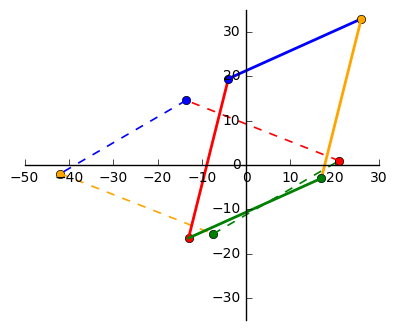

In [15]:
step_3 = U*step_2

print np.around(step_2 , decimals = 4)
print '\ntransformed to:\n'
print np.around(step_3 , decimals = 4)

plt.gcf().clear()
plot_points(step_2.A, colors=colors)
plot_points(step_3.A, '-', lw=2.0, colors=colors)
set_axis()

#### For 3-D:
http://neurochannels.blogspot.com/2008/02/visualizing-svd.html <br>
http://ericthomson.net/svd_visualize.m

### Data Compression
SVD can be used for data compression by storing the truncated forms of U, S, and V in place of A and for variable reduction by replacing A with U. Results will need to be transformed back to the original coordinate system by multiplying with S and V
<br> <br>
See live demo: <br>
http://timbaumann.info/svd-image-compression-demo/

In [16]:
import os

from PIL import Image

Original Image in folder named 'svd_data'

('Size(dimension): ', (5184, 3456))


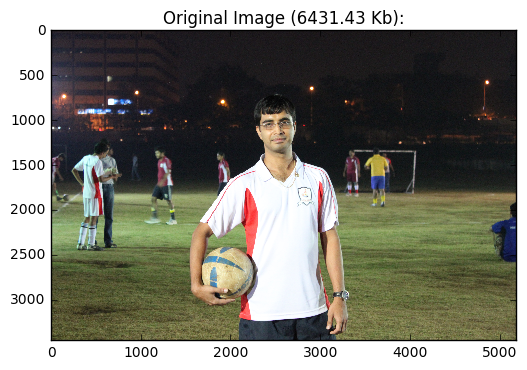

In [17]:
path = 'svd_data/svd_img.JPG'
img = Image.open(path)
s = float(os.path.getsize(path))/1000

plt.gcf().clear()
print("Size(dimension): ",img.size)
plt.title("Original Image (%0.2f Kb):" %s)
plt.imshow(img)

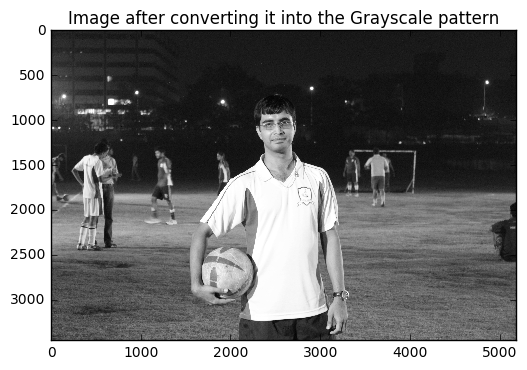

In [18]:
imggray = img.convert('LA')
imgmat = np.array( list(imggray.getdata(band = 0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure()
plt.imshow(imgmat, cmap = 'gray')
plt.title("Image after converting it into the Grayscale pattern")
plt.show()

After compression: 


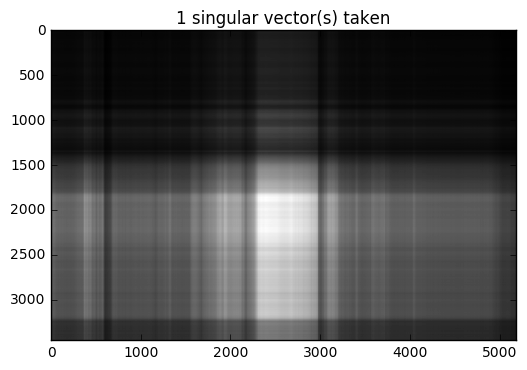

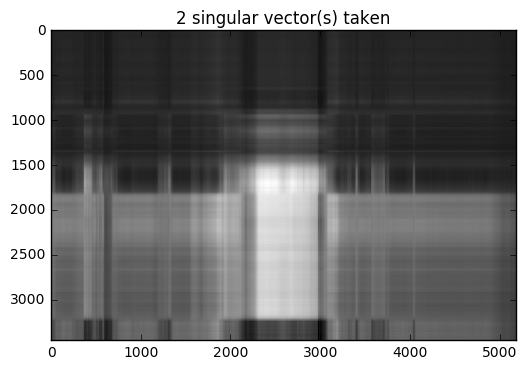

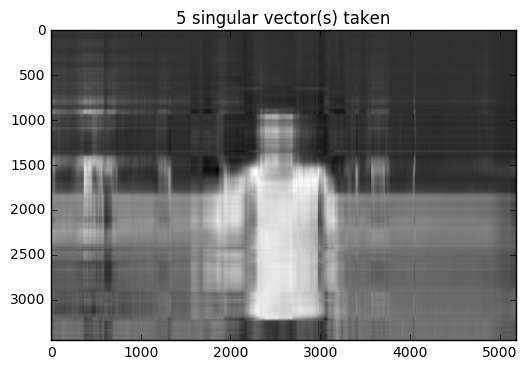

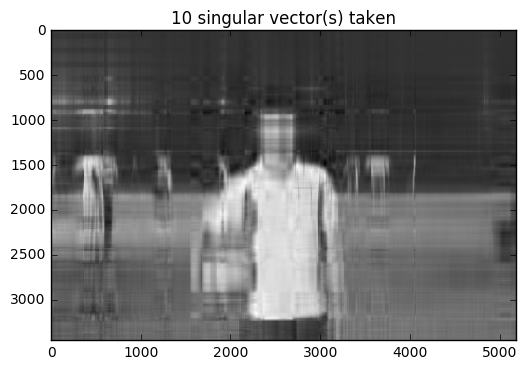

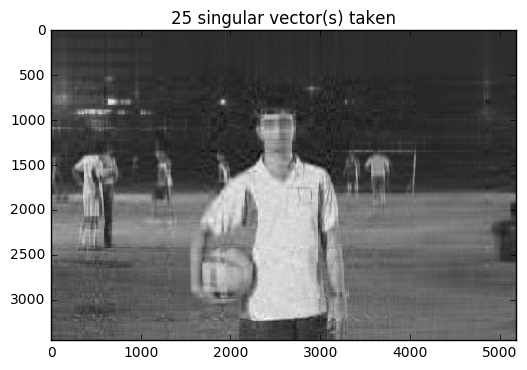

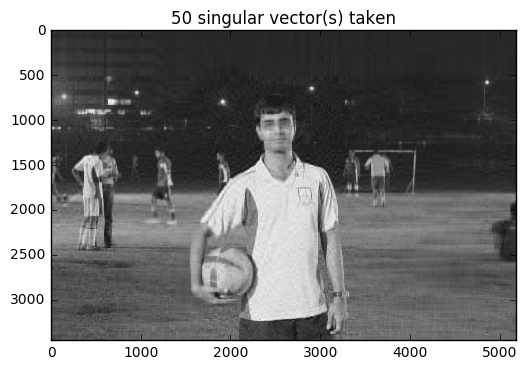

In [19]:
print("After compression: ")
U, S, Vt = np.linalg.svd(imgmat) #single value decomposition
for i in [1,2,5,10,25,50]:
    cmpimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i,:])
    plt.imshow(cmpimg, cmap = 'gray')
    title = "%s singular vector(s) taken" %i
    plt.title(title)
    plt.show()
    result = Image.fromarray((cmpimg ).astype(np.uint8))

If we take just the **first singular vector**: Notice that each row of pixels is the same... just different 'brightness' <br>
Essentially, each row can now be written as as Ri=c(i)⋅SV(1) where c(i) is the scale factor and SV(1) is the singular vector with the highest singular value (biggest contribution to data) <br> <br>

**First two singular vectors**: <br>
Now, each row can be written as the sum of two vectors <br><br>

R(i) = c(i)⋅SV(1) + b(i)⋅SV(2)
<br>
Where SV2 is the second most influential singular vector.
<br><br>
Using 50 unique values and we get a decent representation of what 3456 unique values look like.

## Simple Movie Recommender Using SVD

Given a movie title, we’ll use SVD to recommend other movies based on user ratings. (http://alyssaq.github.io/2015/20150426-simple-movie-recommender-using-svd/)<br>
<br>
Filtering and recommending based on information given by other users is known as collaborative filtering. The assumption is that people with similar movie tastes are most likely to give similar movie ratings.<br>

We’ll be using 2 files from the MovieLens 1M dataset (https://grouplens.org/datasets/movielens/1m/): ratings.dat and movies.dat

In [20]:
# Read the files with pandas
data = pd.io.parsers.read_csv('svd_data/ratings.dat', 
    names=['user_id', 'movie_id', 'rating', 'time'],
    engine='python', delimiter='::')
movie_data = pd.io.parsers.read_csv('svd_data/movies.dat',
    names=['movie_id', 'title', 'genre'],
    engine='python', delimiter='::')

In [21]:
#  Create the ratings matrix of shape (m×u) with rows as movies and columns as users
ratings_mat = np.ndarray(
            shape=(np.max(data.movie_id.values), np.max(data.user_id.values)),
            dtype=np.uint8)
ratings_mat[data.movie_id.values-1, data.user_id.values-1] = data.rating.values

# Normalise matrix
normalised_mat = ratings_mat - np.asarray([(np.mean(ratings_mat, 1))]).T
A = normalised_mat.T / np.sqrt(ratings_mat.shape[0] - 1)

# Compute SVD
U, S, V = np.linalg.svd(A)

In [22]:
# Calculate cosine similarity, sort by most similar and return the top N

def top_cosine_similarity(data, movie_id, top_n=10):
    index = movie_id - 1 # Movie id starts from 1
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

# Helper function to print top N similar movies

def print_similar_movies(movie_data, movie_id, top_indexes):
    print('Recommendations for {0}: \n'.format(
    movie_data[movie_data.movie_id == movie_id].title.values[0]))
    for id in top_indexes + 1:
        print(movie_data[movie_data.movie_id == id].title.values[0])

In [23]:
# Select k principal components to represent the movies, a movie_id to find recommendations and print the top_n results.
k = 50
movie_id = 1 # Grab an id from movies.dat
top_n = 10

sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, movie_id, top_n)
print_similar_movies(movie_data, movie_id, indexes)

Recommendations for Toy Story (1995): 

Toy Story (1995)
Short Cuts (1993)
Cocoon (1985)
Goldfinger (1964)
Civil Action, A (1998)
Balto (1995)
Mystery, Alaska (1999)
Nightwatch (1997)
8MM (1999)
Shadow, The (1994)


Good visual explanations:<br>
http://www.ams.org/publicoutreach/feature-column/fcarc-svd <br>
<br>
C++ Example: https://statsbot.co/blog/singular-value-decomposition-tutorial/